# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [1]:
# ... WRITE YOUR CODE HERE...
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
G = nx.read_edgelist('data/network1.csv',delimiter=',')
#.edges(data=True)

In [2]:
#nx.draw_networkx(G)
#plt.axis('off'); # Makes the plot slightly nicer

In [3]:
print("edges: ", G.number_of_edges())
print("nodes: ", G.number_of_nodes())

edges:  18584
nodes:  13033


#### Exercise 2.2:  Node degree distribution

In [5]:
G.degree()[str(1)]

#degree_array= [0]*len(G.degree())
#for i in range(len(G.degree())):
#               degree_array[i]=G.degree()[str(i)] 


1

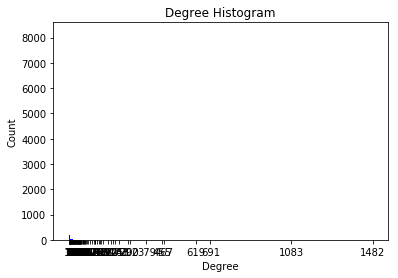

In [61]:
import collections
import matplotlib.pyplot as plt
import networkx as nx


# Your code goes here
degree_sequence = sorted([G.degree()[str(i)] for i in range(len(G.degree()))], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b', ) 

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

"""
# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)"""

plt.show()

AttributeError: 'NoneType' object has no attribute 'plot'

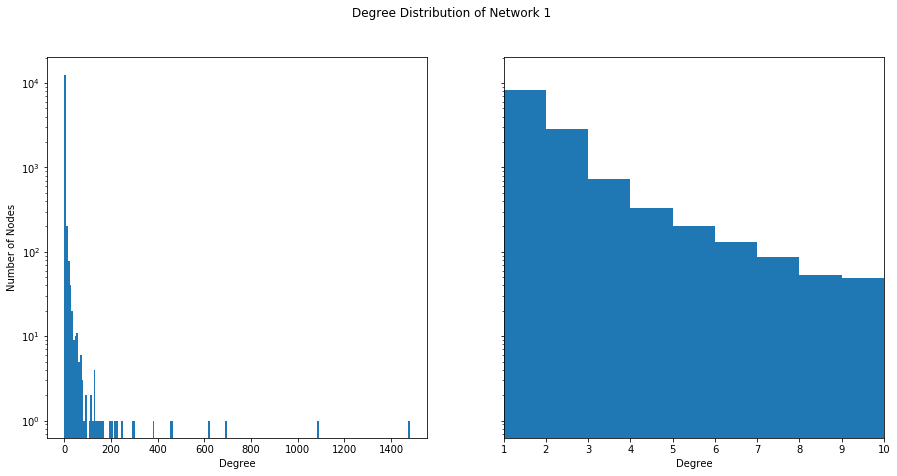

In [67]:
import numpy as np  
degrees = np.array(list((G.degree().values())))

max_degree=0
for d in degrees:
    if d > max_degree:
        max_degree=d
# print(max_degree)
fig, axs = plt.subplots(1,2, sharey=True, figsize=(15,7))
fig.suptitle("Degree Distribution of Network 1")
axs[0].set_yscale('log', basey=10)
axs[0].set_ylabel('Number of Nodes')
axs[0].set_xlabel('Degree')
axs[0].hist(degrees, bins=200)
#show part of the degree histogram
axs[1].set_xlim(1,10)
axs[1].set_xlabel('Degree')
axs[1].hist(degrees, bins=1482)

ax3 = fig.add_subplot()

a = 1.99323054838
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
x = np.linspace(gamma.ppf(0.01, a),gamma.ppf(0.99, a), 100)
ax3.plot(x, gamma.pdf(x, a), 'r-', lw=5, alpha=0.6, label='gamma pdf')


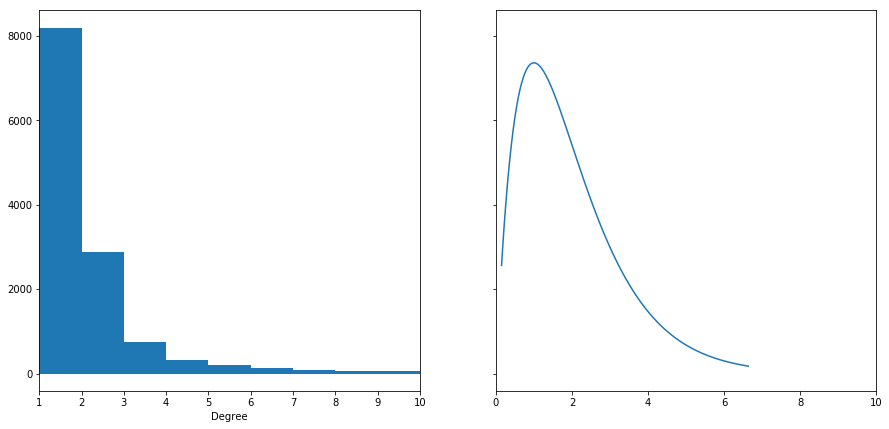

In [85]:
from scipy.stats import gamma
fig, axs = plt.subplots(1,2, sharey=True, figsize=(15,7))
#show part of the degree histogram
axs[0].set_xlim(1,10)
axs[0].set_xlabel('Degree')
axs[0].hist(degrees, bins=1482)
a = 2
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
x = np.linspace(gamma.ppf(0.01, a, scale=1),gamma.ppf(0.99, a, scale=1), num=1480)
axs[1].set_xlim(0,10)
axs[1].plot(x, 20000*gamma.pdf(x, a), label='gamma pdf')


#### Exercise 2.3: Giant component

In [37]:
nx.number_connected_components(G)

192

As there are many connected components the biggest one is automatically the giant component

In [44]:
largest_cc = max(nx.connected_component_subgraphs(G), key=len)

print ("size:")
print("edges: ", largest_cc.number_of_edges())
print("nodes: ", largest_cc.number_of_nodes())

size:
edges:  18317
nodes:  12576


#### Exercise 2.4: Short paths & Small-worlds

#### Exercise 2.5: Network comparison

In [ ]:
#import graph
G = nx.read_edgelist('data/network2.csv',delimiter=',')

print("edges: ", G.number_of_edges())
print("nodes: ", G.number_of_nodes())

import collections
import matplotlib.pyplot as plt
import networkx as nx


degree_array=[G.degree().get(str(i))  for i in range(len(G.degree()))]

for i in range(len(degree_array)):
    if degree_array[i]==None:
        degree_array[i]=0




# Your code goes here
degree_sequence = sorted(degree_array, reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

"""
# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)"""

plt.show()

print("number of connected components: ", nx.number_connected_components(G))

largest_cc = max(nx.connected_component_subgraphs(G), key=len)

print ("size of giant component:")
print("edges: ", largest_cc.number_of_edges())
print("nodes: ", largest_cc.number_of_nodes())

edges:  43516
nodes:  26542


In [ ]:
#alt #az
import numpy as np  
degrees = np.array(list((G.degree().values())))

# Get the indices of the nodes in decreasing order w.r.t their degree
ind = np.argsort(degrees)[::-1]

# Plot the histogram
plt.hist(degrees, bins=200,log=True)
plt.title("Degree distribution of network2")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.grid()
plt.show()

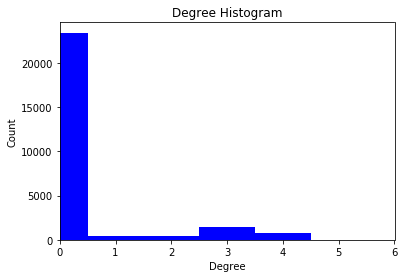

In [61]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=1, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xbound(upper=6,lower=0)
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)
#there is no higher degree than 20
#Histrogram is a good way to show and compare the amount of nodes having differnt degrees

#### Comparison of Graphs

Network two has around double the amount of edges and nodes than network one, so it is much bigger. 
In network one each node has at least one edge, (fully connected?)
While Network two has nodes without any edges. In fact the degree distribution shows that in network two the majority of edges has degree 0 and the rest has degrees between 1 and 4. In network one the majority of nodes have degree one that being the lowest existing degree. The highest degree is 20 ???? The distribution seems to be close to an exponential distribution.
Network one has much more connected components than network two even though both have a giant component.

#### Exercise 2.6: Network identification

Network one resembles the roads of New York while Network two shows the router connection.
That is because network two has many nodes with degree 0. This is not possible for streets and intersections, because an intersection always has to be on a road and that road should always lead somewhere??/ to another intersection. 
Routers on the other hand do not have to be connected physically and thus there can be many islands or single nodes. 